In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist 

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

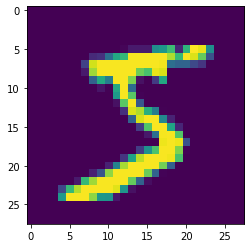

In [9]:
plt.imshow(single_image)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train.shape

(60000,)

In [14]:
y_cat_train = to_categorical(y_train,num_classes=10)

In [15]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [17]:
x_train = x_train / 255
x_test = x_test / 255

In [18]:
scaled_image = x_train[0]

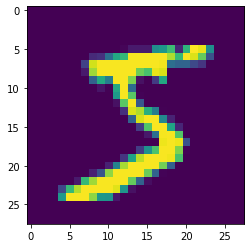

In [19]:
plt.imshow(scaled_image)

In [20]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [21]:
from tensorflow.keras.models import Sequential

In [22]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [25]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [28]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2814 - accuracy: 0.9165 - val_loss: 0.0490 - val_accuracy: 0.9827
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0494 - accuracy: 0.9851 - val_loss: 0.0449 - val_accuracy: 0.9845
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0268 - accuracy: 0.9919 - val_loss: 0.0383 - val_accuracy: 0.9870
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0187 - accuracy: 0.9938 - val_loss: 0.0409 - val_accuracy: 0.9859


In [29]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

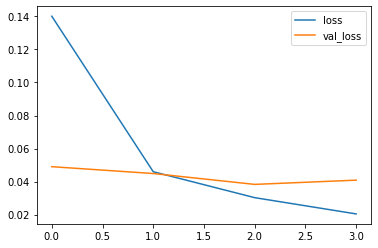

In [31]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

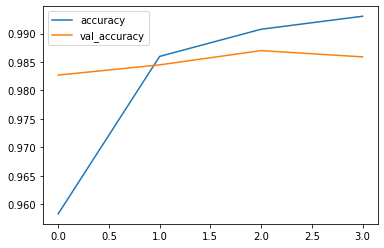

In [32]:
metrics[['accuracy','val_accuracy']].plot()

In [33]:
model.metrics_names

['loss', 'accuracy']

In [34]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.04086976498365402, 0.9858999848365784]

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       1.00      0.98      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [43]:
confusion_matrix(y_test,predictions)

array([[ 973,    0,    1,    0,    0,    1,    1,    0,    1,    3],
       [   0, 1128,    2,    0,    0,    1,    2,    0,    1,    1],
       [   2,    1, 1013,    0,    1,    0,    0,    4,   10,    1],
       [   1,    0,    2,  991,    0,    9,    0,    0,    7,    0],
       [   0,    0,    0,    0,  966,    0,    2,    1,    1,   12],
       [   1,    0,    0,    3,    0,  886,    2,    0,    0,    0],
       [   4,    2,    0,    1,    3,    3,  942,    0,    3,    0],
       [   1,    2,    5,    0,    0,    1,    0, 1006,    1,   12],
       [   3,    0,    0,    0,    0,    1,    1,    3,  961,    5],
       [   1,    1,    0,    0,    7,    4,    0,    0,    3,  993]])

In [44]:
import seaborn as sns

<AxesSubplot:>

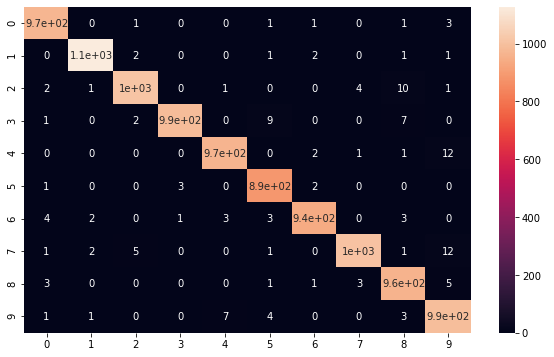

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [47]:
my_number = x_test[0]

In [48]:
my_number.shape

(28, 28, 1)

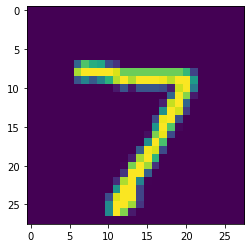

In [51]:
plt.imshow(my_number.reshape(28,28))

In [54]:
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=-1)

array([7])